In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch
import torch.nn as nn

from PIL import Image
from torch.utils.data import DataLoader

from task_1_convnet.datasets import FruitDataset

In [2]:
path = r'D:\dnn-exercises\data\fruits-360\Training' 

In [3]:
counts = [len(os.listdir(path + '/' + d)) for d in os.listdir(path)]

In [4]:
np.cumsum(counts)

array([  492,   984,  1476,  1957,  2449,  2941,  3433,  3862,  4352,
        4844,  5516,  6008,  6435,  6926,  7416,  7866,  8356,  8846,
        9338,  9830, 10320, 10812, 11550, 12288, 12780, 13272, 13764,
       14214, 14704, 15194, 15684, 16174, 17158, 17650, 18140, 18630,
       19122, 19593, 20083, 20575, 21065, 21529, 22019, 22509, 22975,
       23465, 23957, 24447, 24937, 25427, 25917, 26407, 26707, 27197,
       27935, 28427, 28919, 29398, 29890, 30380, 30872, 31610, 32102,
       32594, 33084, 33384, 33874, 34364, 34854, 35346, 35838, 36328,
       36821, 37311, 37758, 38178, 39078, 39570, 40020, 40510, 41002,
       41492, 41984, 42474, 42966, 43704, 44194, 44684, 45422, 46094,
       46832, 47311, 47803, 48170, 48905], dtype=int32)

In [5]:
(2000 // np.cumsum(counts)) > 0

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [6]:
im = Image.open(path + '/Pomelo Sweetie/0_100.jpg')
im.show()

## Testing the dataset

In [7]:
fds = FruitDataset(r'D:\dnn-exercises\data\fruits-360\Training')

In [8]:
len(fds)

48905

In [9]:
fds[48904]['y']

94

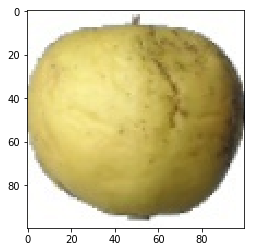

In [10]:
plt.imshow(fds[492]['image'].permute(1, 2, 0))

## DataLoader

In [11]:
dl = DataLoader(fds, batch_size=128)

In [22]:
a = torch.randint(1, 10, (5,3))

In [24]:
a

tensor([[8, 3, 7],
        [8, 2, 8],
        [3, 8, 5],
        [2, 2, 4],
        [7, 8, 6]])

In [29]:
a.max(dim=1)

torch.return_types.max(
values=tensor([8, 8, 8, 4, 8]),
indices=tensor([0, 2, 1, 2, 1]))

In [31]:
a = nn.Linear(10, 10)

In [32]:
type(a)

torch.nn.modules.linear.Linear

IndexError: index 13 is out of bounds for dimension 0 with size 5

In [20]:
for i, batch in enumerate(dl):
    print(batch['image'].shape)

torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])
torch.Size([128, 3, 100, 100])


KeyboardInterrupt: 

## BatchNorm

In [24]:
a = np.random.randint(1, 10, (5,3))

In [27]:
a

array([[7, 6, 8],
       [5, 3, 2],
       [5, 7, 7],
       [8, 6, 4],
       [7, 3, 1]])

In [29]:
np.mean(a, axis=0)

array([6.4, 5. , 4.4])

In [28]:
a - np.mean(a, axis=0)

array([[ 0.6,  1. ,  3.6],
       [-1.4, -2. , -2.4],
       [-1.4,  2. ,  2.6],
       [ 1.6,  1. , -0.4],
       [ 0.6, -2. , -3.4]])